<a href="https://colab.research.google.com/github/ITanmayee/wise_ml/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Wine.csv')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
data.columns = ['Class', 
                'alcohol',
                'malic_acid',
                 'ash',
                 'alcalinity_of_ash',
                 'magnesium',
                 'total_phenols',
                 'flavanoids',
                 'nonflavanoid_phenols',
                 'proanthocyanins',
                 'color_intensity',
                 'hue',
                 'od280/od315_of_diluted_wines',
                 'proline']


data.head()

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       177 non-null    int64  
 1   Malic acid  177 non-null    float64
 2   col2        177 non-null    float64
 3   col3        177 non-null    float64
 4   col4        177 non-null    float64
 5   col5        177 non-null    int64  
 6   col6        177 non-null    float64
 7   col7        177 non-null    float64
 8   col8        177 non-null    float64
 9   col9        177 non-null    float64
 10  col10       177 non-null    float64
 11  col11       177 non-null    float64
 12  col12       177 non-null    float64
 13  col13       177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


<Figure size 1440x1440 with 0 Axes>

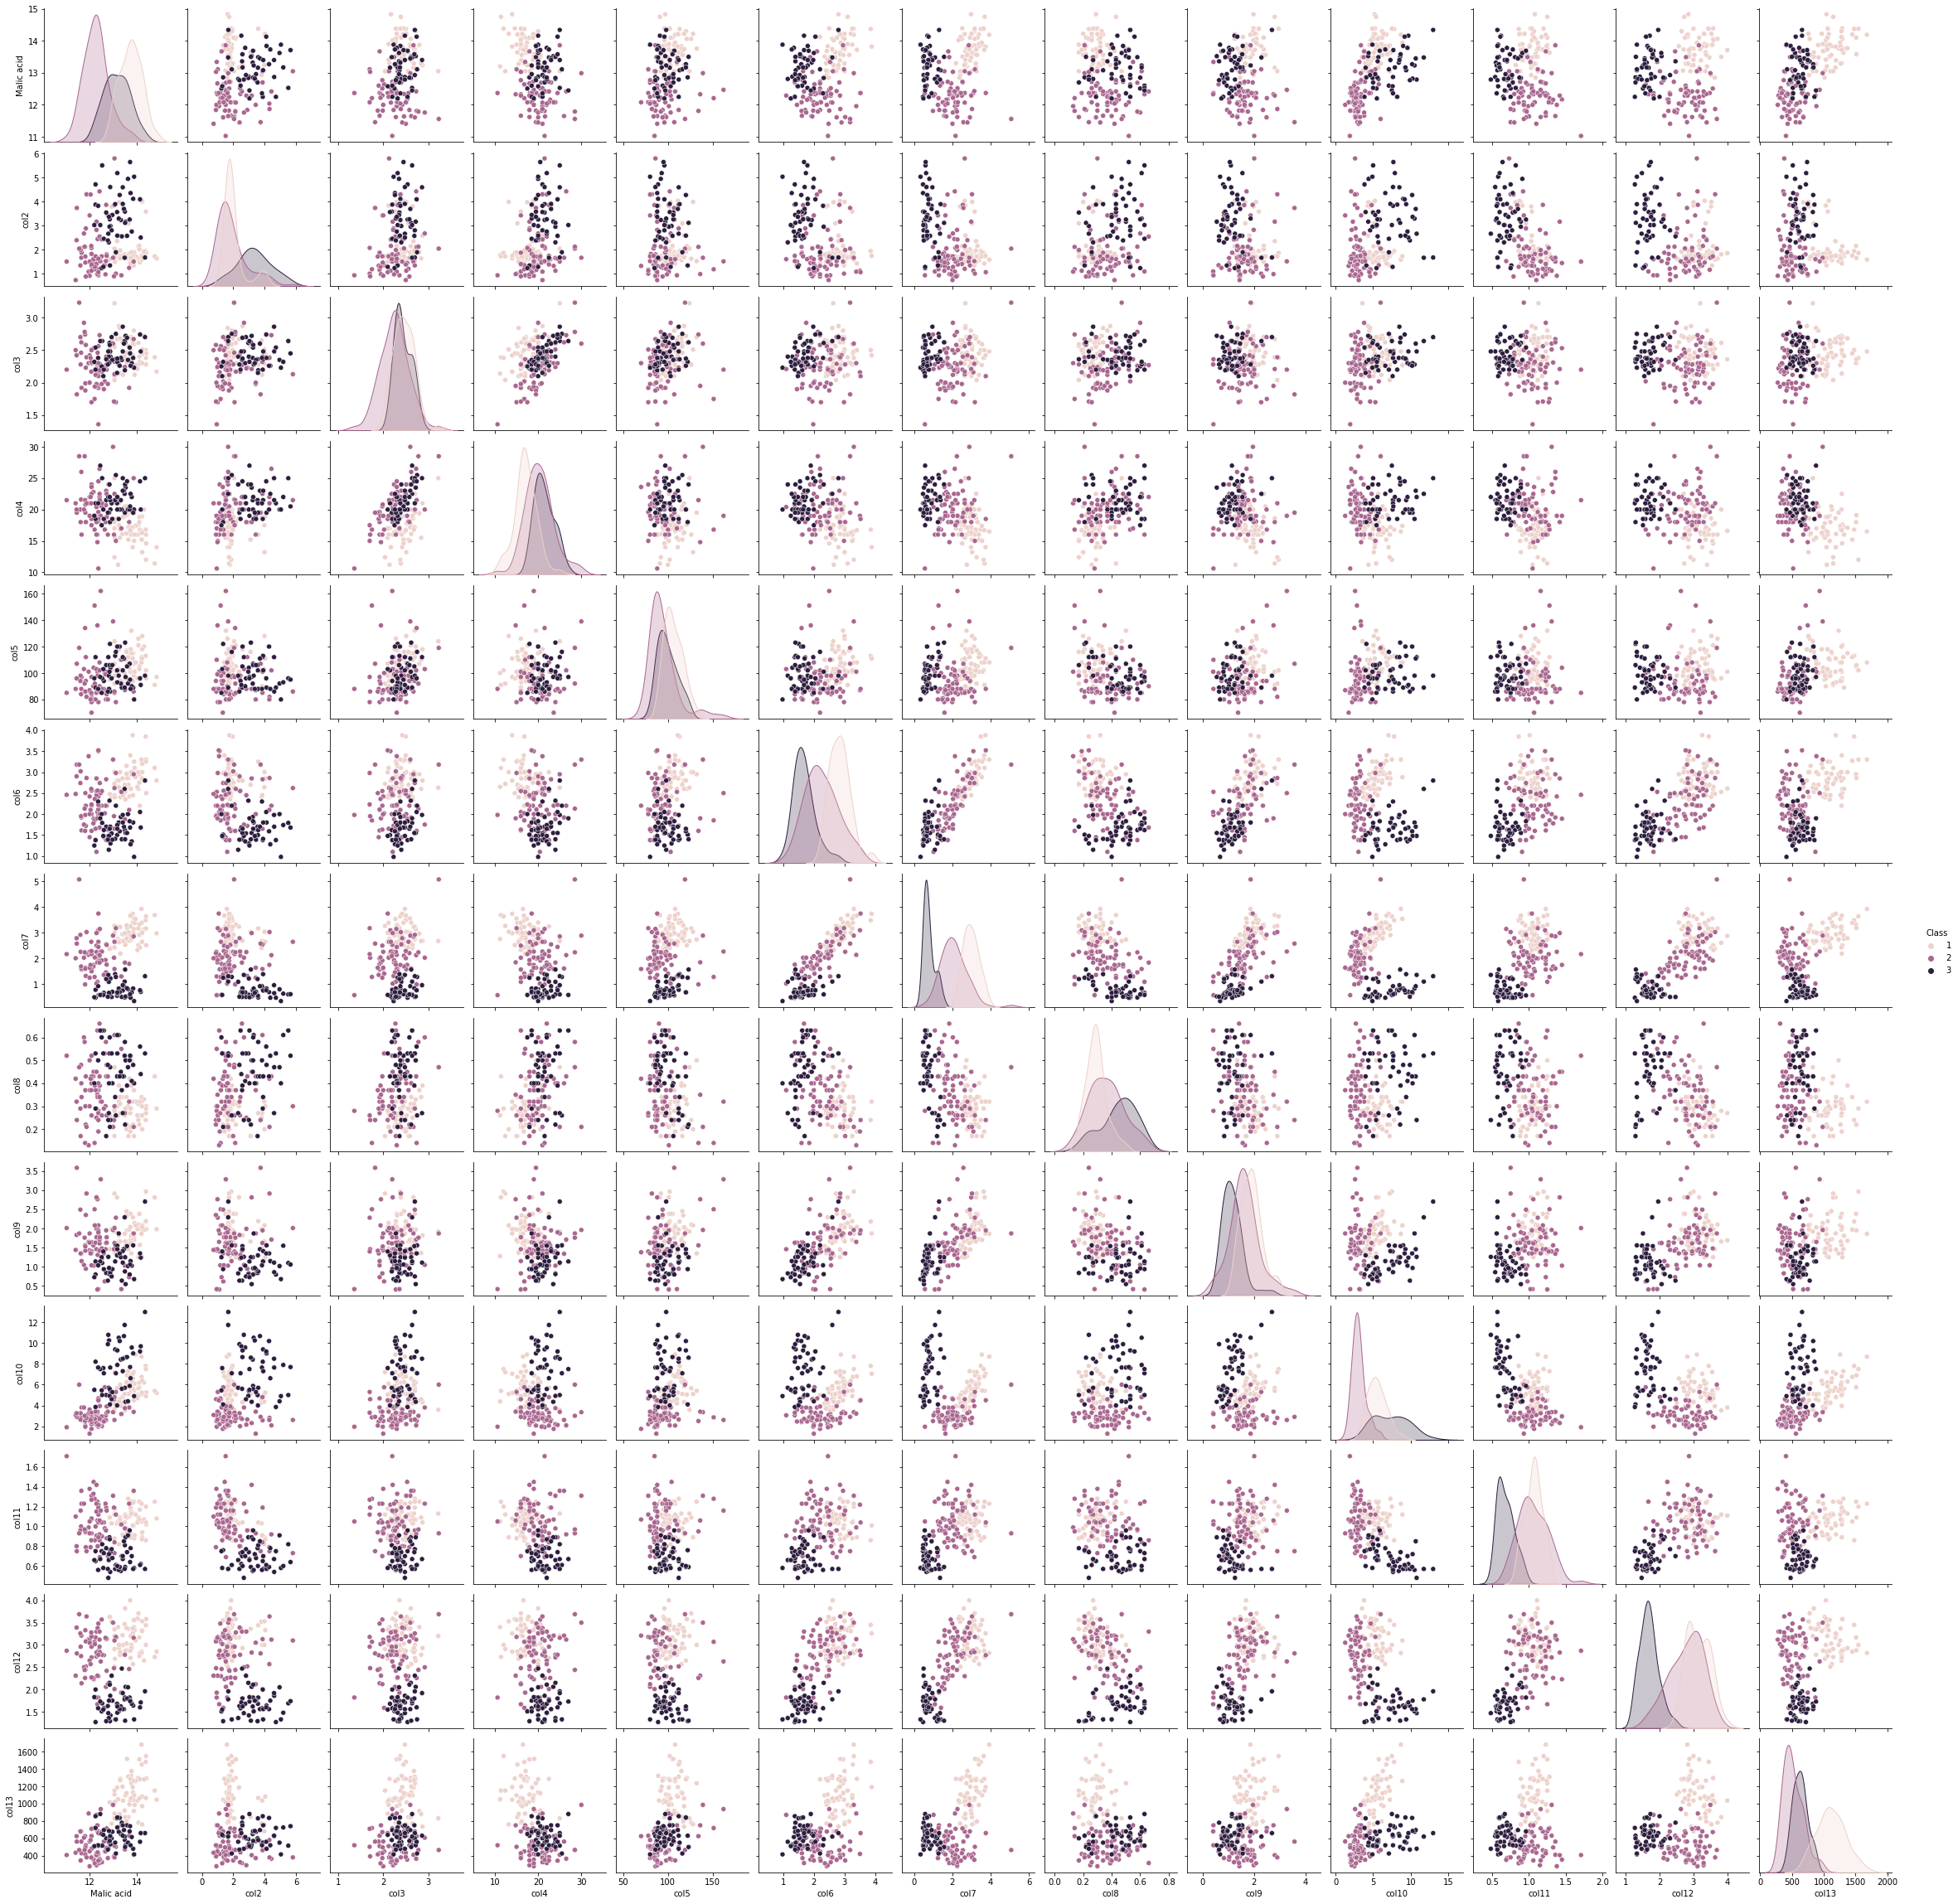

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Class')
plt.show()
plt.close()

KNN

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [ ]:
k_range = range(1, 20)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)

    train_pred = knn_model.predict(x_train)
    test_pred =  knn_model.predict(x_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

print(train_acc)
print(test_acc)

[1.0, 0.8723404255319149, 0.8652482269503546, 0.8226950354609929, 0.8014184397163121, 0.8085106382978723, 0.7943262411347518, 0.7872340425531915, 0.7801418439716312, 0.7872340425531915, 0.7943262411347518, 0.75177304964539, 0.7375886524822695, 0.7304964539007093, 0.7446808510638298, 0.7375886524822695, 0.7446808510638298, 0.7446808510638298, 0.7446808510638298]
[0.75, 0.6944444444444444, 0.7222222222222222, 0.6111111111111112, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6111111111111112, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.5833333333333334, 0.6666666666666666, 0.6666666666666666]


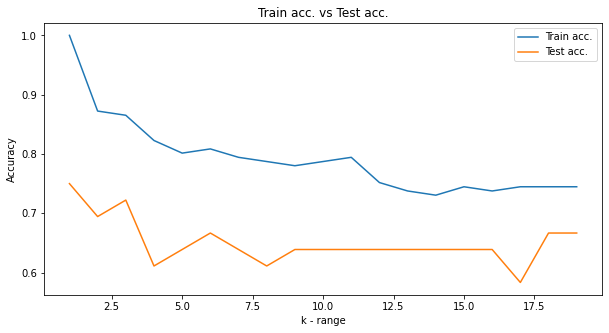

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x_train, y_train)

train_pred = knn_model.predict(x_train)
test_pred =  knn_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 74.468%
Testing Accuracy: 66.667%


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

train_pred = knn_model.predict(x_train)
test_pred =  knn_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 75.000%


Logistic regression

In [ ]:
logreg_model = LogisticRegression(max_iter=2500)
logreg_model.fit(x_train, y_train)

train_pred = logreg_model.predict(x_train)
test_pred =  logreg_model.predict(x_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 99.291%
Testing Accuracy: 97.222%


**Decission Trees**

CART DT

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=50)
dt_model.fit(x_train, y_train)

train_pred = dt_model.predict(x_train)
test_pred =  dt_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 83.333%


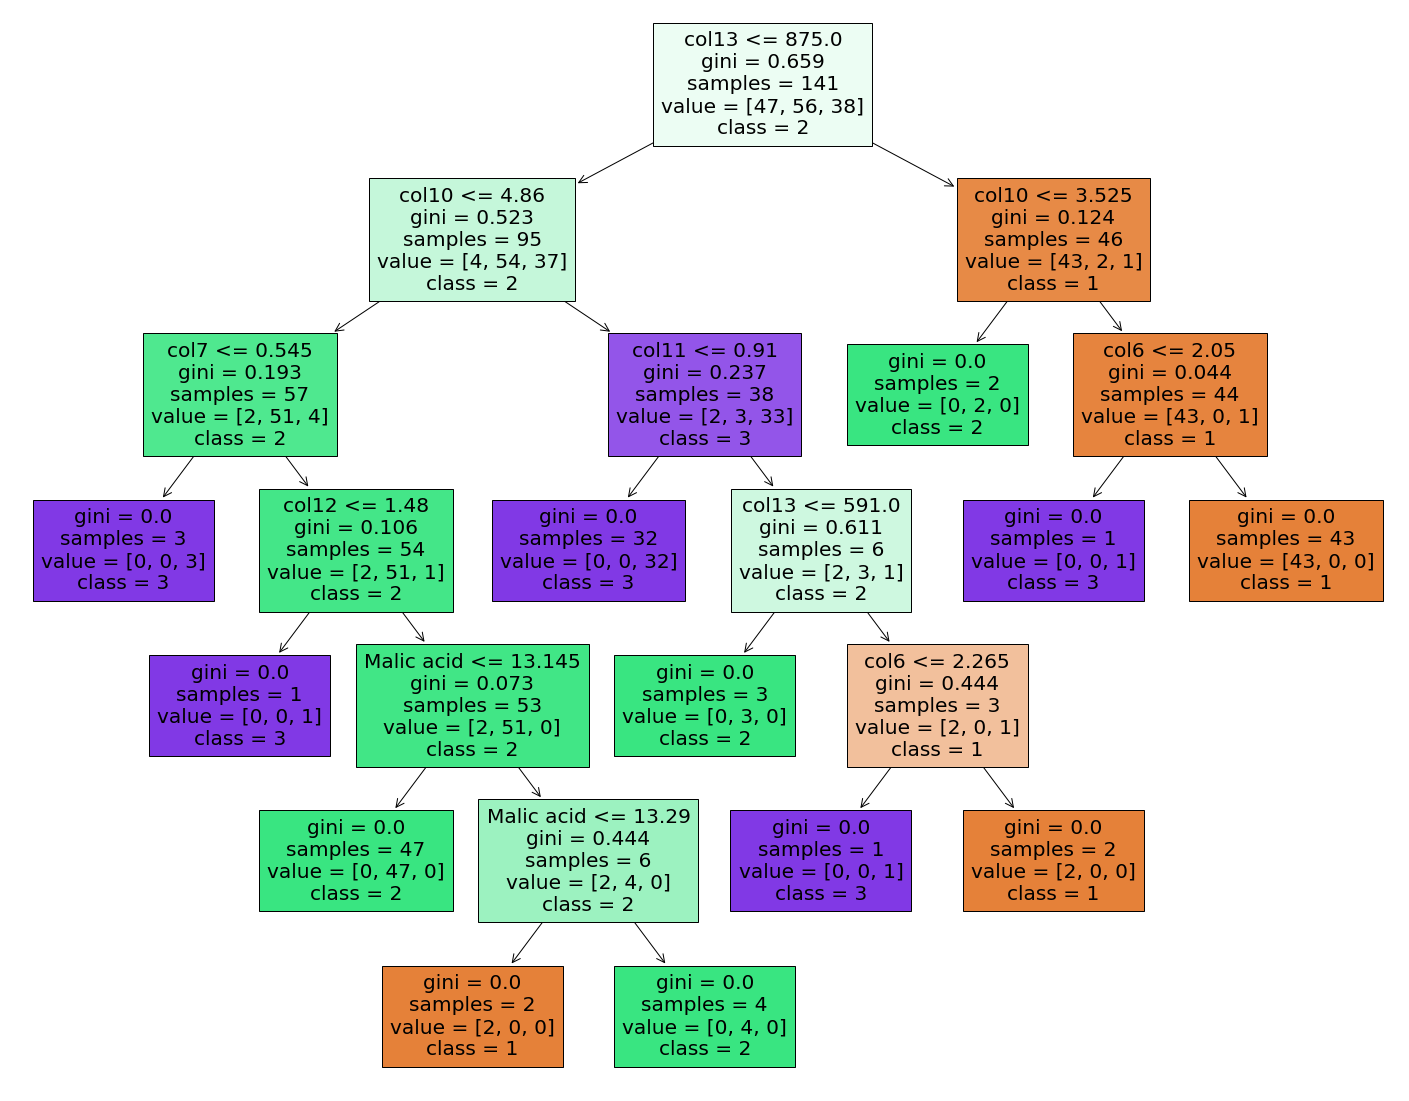

In [ ]:
fig = plt.figure(figsize=(25, 20))
class_str = [str(i) for i in data['Class'].unique()]
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=class_str)
plt.show()

ID3 DT

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=50)
dt_model.fit(x_train, y_train)

train_pred = dt_model.predict(x_train)
test_pred =  dt_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 88.889%


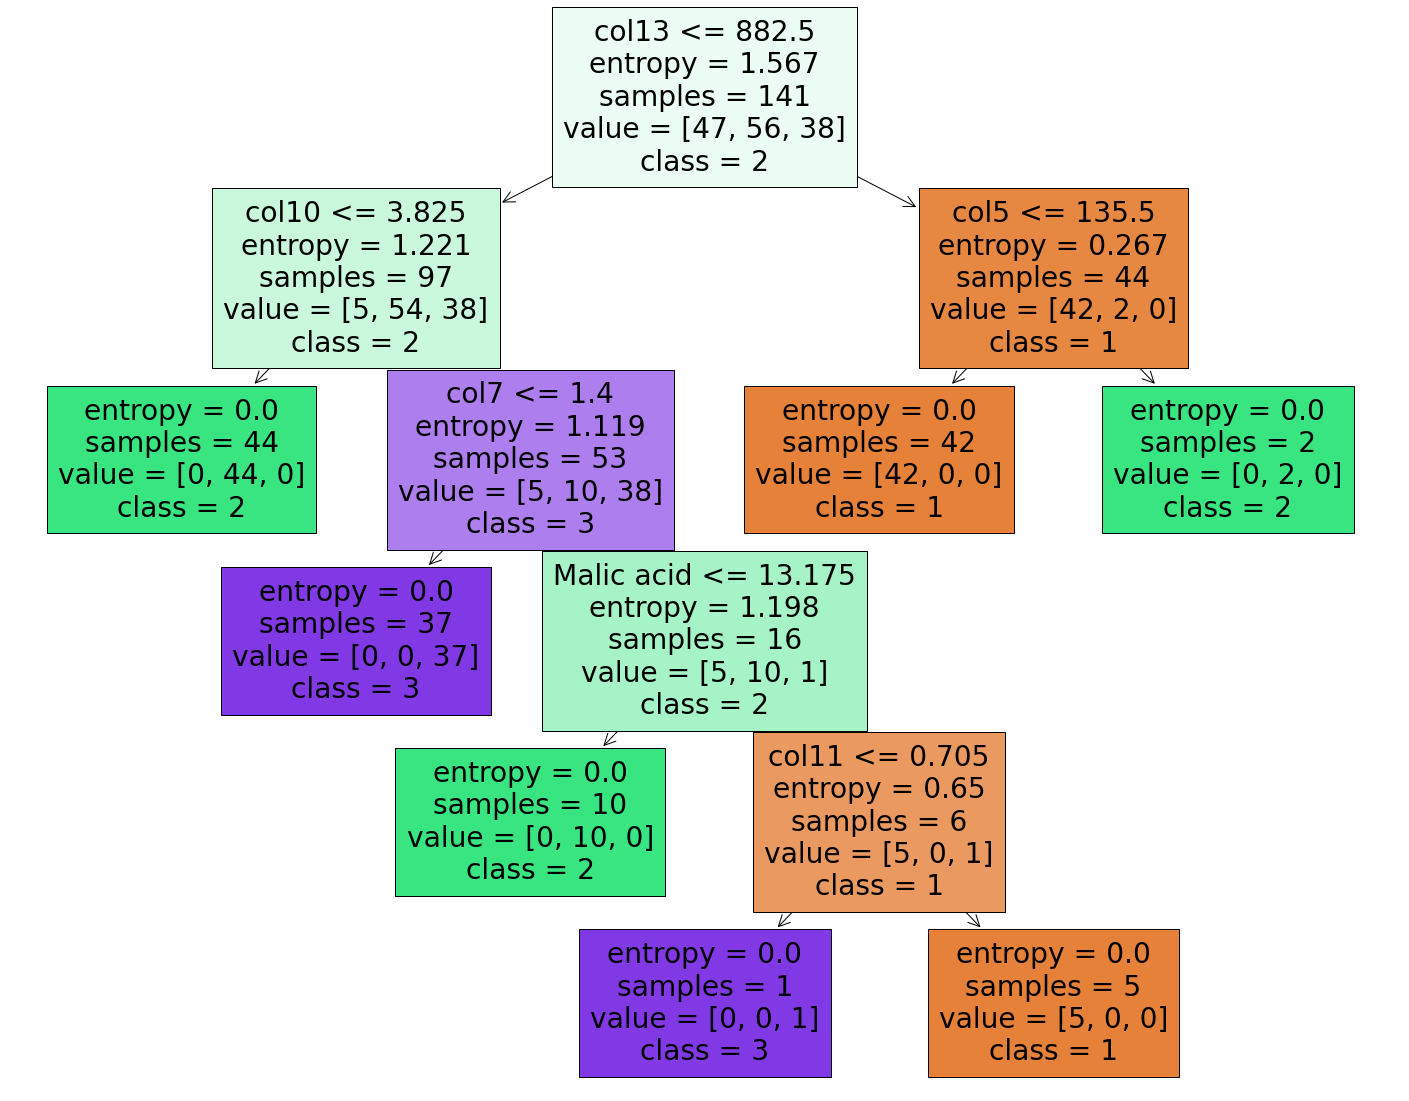

In [ ]:
fig = plt.figure(figsize=(25, 20))
class_str = [str(i) for i in data['Class'].unique()]
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=class_str)
plt.show()